In [1]:
%pip install textblob sklearn matplotlib seaborn nltk


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

pride_and_prejudice_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Pride-and-Prejudice_Jane-Austen.txt'
wuthering_heights_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Wuthering-Heights-Emily-Bronte.txt'

pride_and_prejudice = read_text_file(pride_and_prejudice_path)
wuthering_heights = read_text_file(wuthering_heights_path)

texts = [pride_and_prejudice, wuthering_heights]

In [5]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

preprocessed_texts = [preprocess(text) for text in texts]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


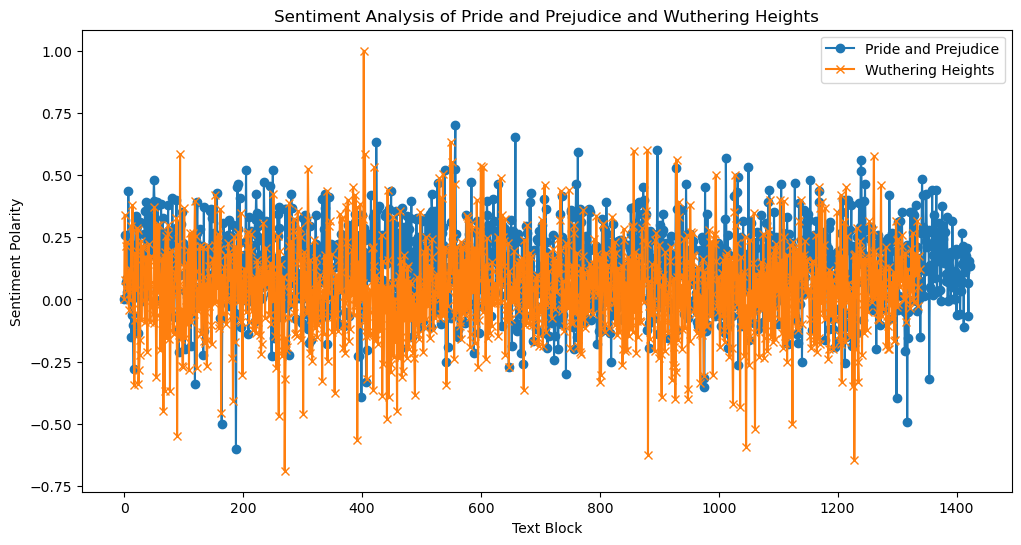

In [6]:
from textblob import TextBlob
import matplotlib.pyplot as plt

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

block_size = 500 
blocks_pp = [pride_and_prejudice[i:i+block_size] for i in range(0, len(pride_and_prejudice), block_size)]
blocks_wh = [wuthering_heights[i:i+block_size] for i in range(0, len(wuthering_heights), block_size)]

sentiments_pp = [get_sentiment(block) for block in blocks_pp]
sentiments_wh = [get_sentiment(block) for block in blocks_wh]

plt.figure(figsize=(12, 6))
plt.plot(sentiments_pp, label='Pride and Prejudice', marker='o')
plt.plot(sentiments_wh, label='Wuthering Heights', marker='x')
plt.xlabel('Text Block')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis of Pride and Prejudice and Wuthering Heights')
plt.legend()
plt.show()

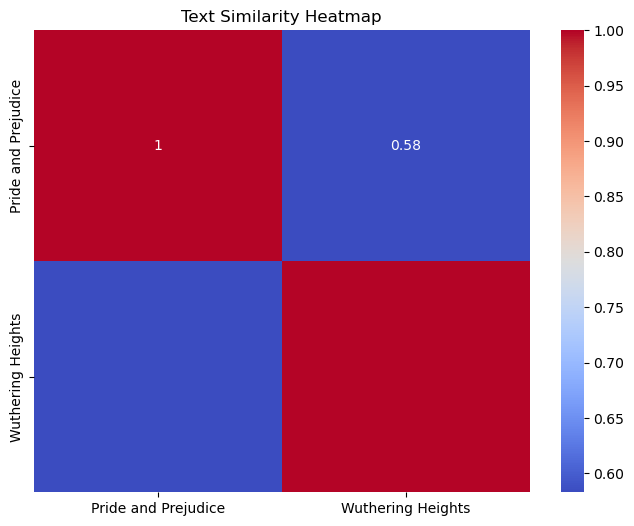

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cosine_similarities, annot=True, cmap='coolwarm', xticklabels=['Pride and Prejudice', 'Wuthering Heights'], yticklabels=['Pride and Prejudice', 'Wuthering Heights'])
plt.title('Text Similarity Heatmap')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0:
catherine master ill come go answered hand little dont im
Topic 1:
project work gutenbergtm gutenberg electronic foundation state term may copy
Topic 2:
catherine dont shall ill im go come like master till
Topic 3:
much miss every lady sister never know time though well
Topic 4:
catherine im ill master see dont come hand door house


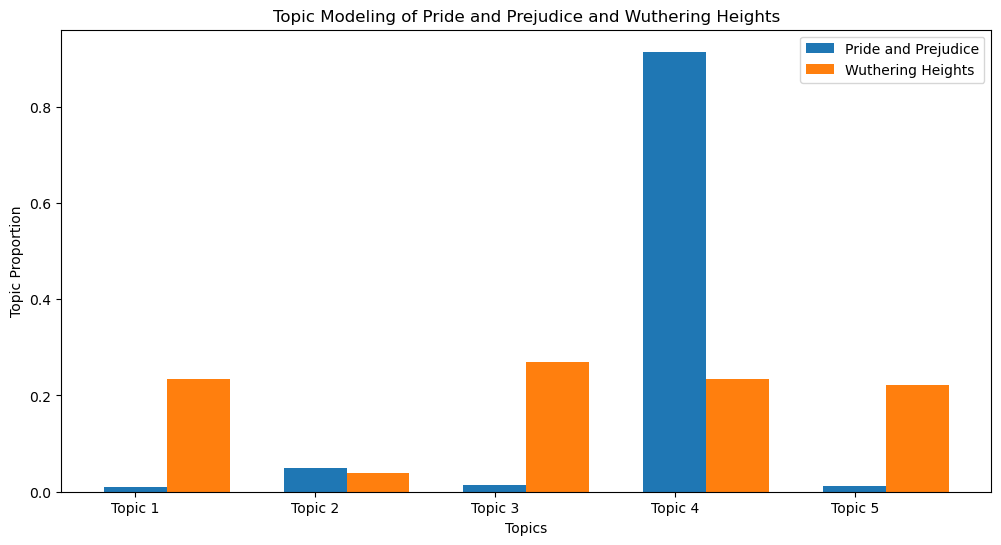

In [8]:
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# NLTK 데이터 다운로드 (최초 실행 시 필요)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 텍스트 파일 읽기
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# 파일 경로
pride_and_prejudice_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Pride-and-Prejudice_Jane-Austen.txt'
wuthering_heights_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Wuthering-Heights-Emily-Bronte.txt'

# 텍스트 데이터 읽기
pride_and_prejudice = read_text_file(pride_and_prejudice_path)
wuthering_heights = read_text_file(wuthering_heights_path)

# 텍스트 전처리
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

preprocessed_texts = [preprocess(text) for text in [pride_and_prejudice, wuthering_heights]]

# 주요 등장인물 이름 목록
character_names = [
    'elizabeth', 'darcy', 'bennet', 'jane', 'bingley', 'collins', 'lydia', 'wickham', 'gardiner', 'lizzy',
    'heathcliff', 'linton', 'hareton', 'joseph', 'edgar', 'cathy', 'earnshaw', 'ellen', 'ive', 'grange'
]

# 기본 불용어에 등장인물 이름을 추가 (리스트로 변환)
stop_words = list(set(stopwords.words('english')).union(set(character_names)))

# 텍스트를 블록으로 나누기
def create_blocks(text, block_size):
    words = text.split()
    return [' '.join(words[i:i + block_size]) for i in range(0, len(words), block_size)]

block_size = 500  # 블록 크기 설정
blocks_pp = create_blocks(preprocessed_texts[0], block_size)
blocks_wh = create_blocks(preprocessed_texts[1], block_size)
all_blocks = blocks_pp + blocks_wh

vectorizer = CountVectorizer(max_df=0.85, min_df=1, stop_words=stop_words)
tf = vectorizer.fit_transform(all_blocks)

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)

topic_distribution_pp = lda.transform(vectorizer.transform(blocks_pp)).mean(axis=0)
topic_distribution_wh = lda.transform(vectorizer.transform(blocks_wh)).mean(axis=0)

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(topic_distribution_pp))
plt.bar(index, topic_distribution_pp, bar_width, label='Pride and Prejudice')
plt.bar([i + bar_width for i in index], topic_distribution_wh, bar_width, label='Wuthering Heights')
plt.xlabel('Topics')
plt.ylabel('Topic Proportion')
plt.title('Topic Modeling of Pride and Prejudice and Wuthering Heights')
plt.xticks(index, [f'Topic {i+1}' for i in index])
plt.legend()
plt.show()


In [9]:
pip install nltk networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


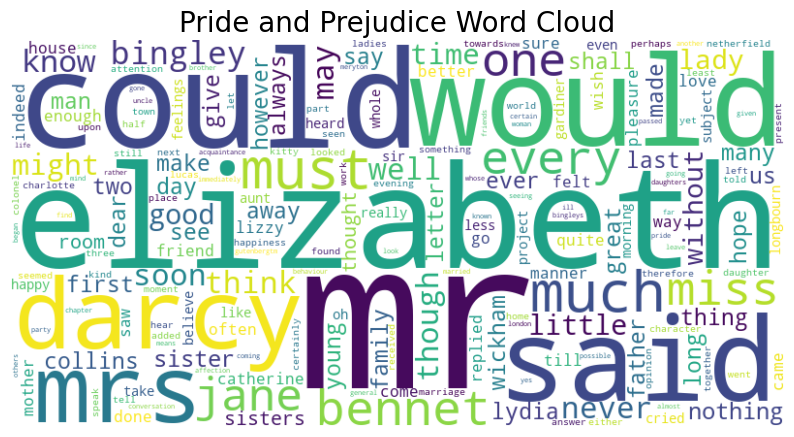

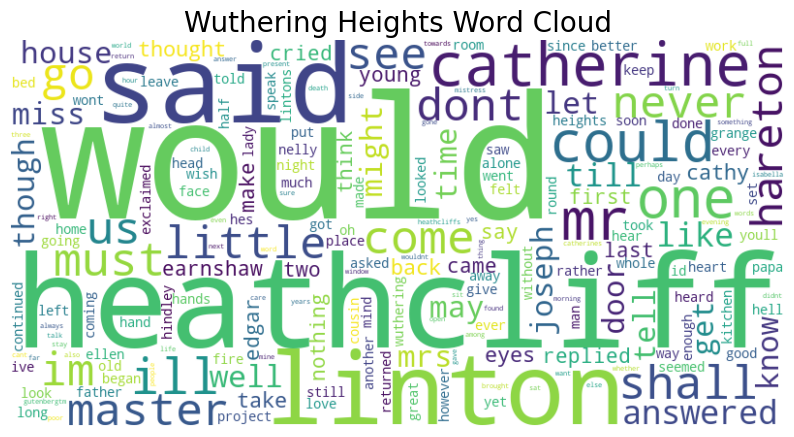

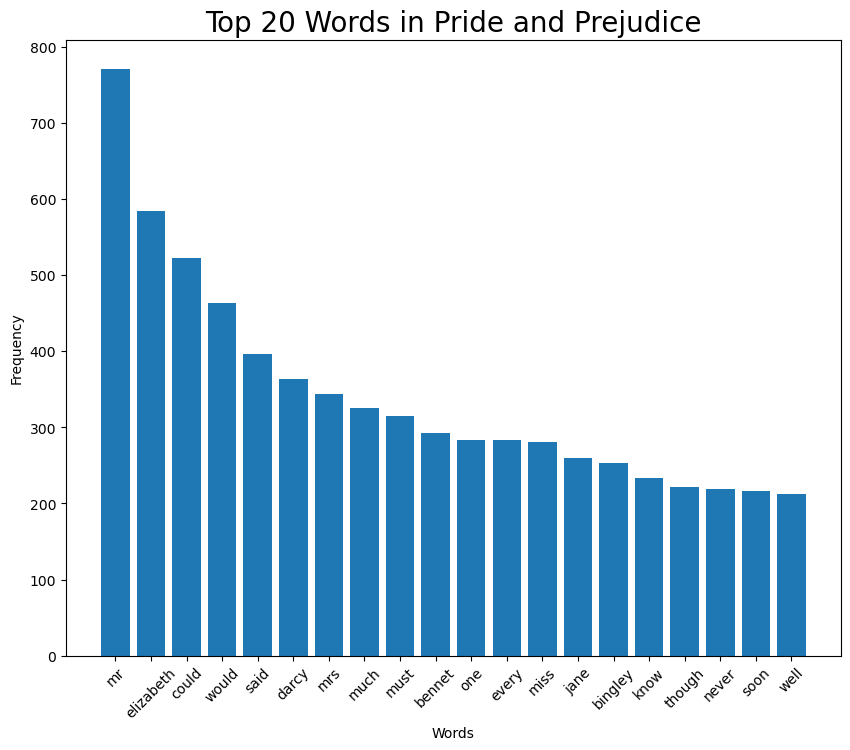

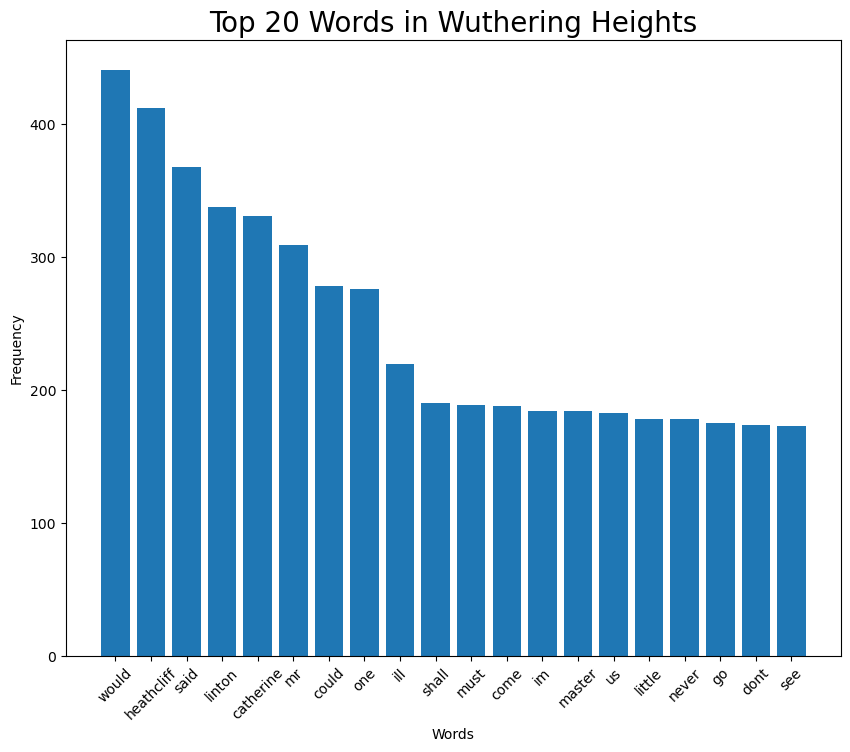

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLTK 데이터 다운로드 (최초 실행 시 필요)
nltk.download('punkt')
nltk.download('stopwords')

# 텍스트 파일 읽기 함수
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# 파일 경로
pride_and_prejudice_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Pride-and-Prejudice_Jane-Austen.txt'
wuthering_heights_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Wuthering-Heights-Emily-Bronte.txt'

# 텍스트 데이터 읽기
pride_and_prejudice = read_text_file(pride_and_prejudice_path)
wuthering_heights = read_text_file(wuthering_heights_path)

# 텍스트 전처리 함수
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

pride_and_prejudice = preprocess(pride_and_prejudice)
wuthering_heights = preprocess(wuthering_heights)

# 단어 토큰화 및 불용어 제거
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

tokens_pp = tokenize_and_remove_stopwords(pride_and_prejudice)
tokens_wh = tokenize_and_remove_stopwords(wuthering_heights)

word_counts_pp = Counter(tokens_pp)
word_counts_wh = Counter(tokens_wh)

most_common_pp = word_counts_pp.most_common(20)
most_common_wh = word_counts_wh.most_common(20)

def generate_wordcloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

generate_wordcloud(word_counts_pp, 'Pride and Prejudice Word Cloud')
generate_wordcloud(word_counts_wh, 'Wuthering Heights Word Cloud')

# 막대 그래프 시각화 함수
def plot_most_common_words(most_common, title):
    words, counts = zip(*most_common)
    plt.figure(figsize=(10, 8))
    plt.bar(words, counts)
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# 막대 그래프 시각화
plot_most_common_words(most_common_pp, 'Top 20 Words in Pride and Prejudice')
plot_most_common_words(most_common_wh, 'Top 20 Words in Wuthering Heights')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Type-Token Ratio for Pride and Prejudice: 0.12566256361491188
Type-Token Ratio for Wuthering Heights: 0.17926441282382966


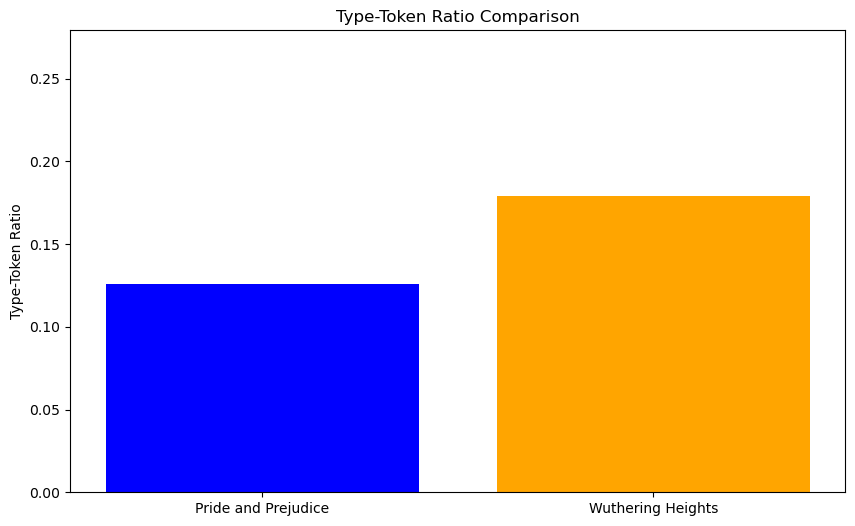

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter

# NLTK 데이터 다운로드 (최초 실행 시 필요)
nltk.download('punkt')
nltk.download('stopwords')

# 텍스트 파일 읽기 함수
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# 파일 경로
pride_and_prejudice_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Pride-and-Prejudice_Jane-Austen.txt'
wuthering_heights_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Wuthering-Heights-Emily-Bronte.txt'

# 텍스트 데이터 읽기
pride_and_prejudice = read_text_file(pride_and_prejudice_path)
wuthering_heights = read_text_file(wuthering_heights_path)

# 텍스트 전처리 함수
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

pride_and_prejudice = preprocess(pride_and_prejudice)
wuthering_heights = preprocess(wuthering_heights)

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

tokens_pp = tokenize_and_remove_stopwords(pride_and_prejudice)
tokens_wh = tokenize_and_remove_stopwords(wuthering_heights)

def type_token_ratio(tokens):
    return len(set(tokens)) / len(tokens)

ttr_pp = type_token_ratio(tokens_pp)
ttr_wh = type_token_ratio(tokens_wh)

print("Type-Token Ratio for Pride and Prejudice:", ttr_pp)
print("Type-Token Ratio for Wuthering Heights:", ttr_wh)

# 결과 시각화
labels = ['Pride and Prejudice', 'Wuthering Heights']
ttr_values = [ttr_pp, ttr_wh]

plt.figure(figsize=(10, 6))
plt.bar(labels, ttr_values, color=['blue', 'orange'])
plt.title('Type-Token Ratio Comparison')
plt.ylabel('Type-Token Ratio')
plt.ylim(0, max(ttr_values) + 0.1)
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


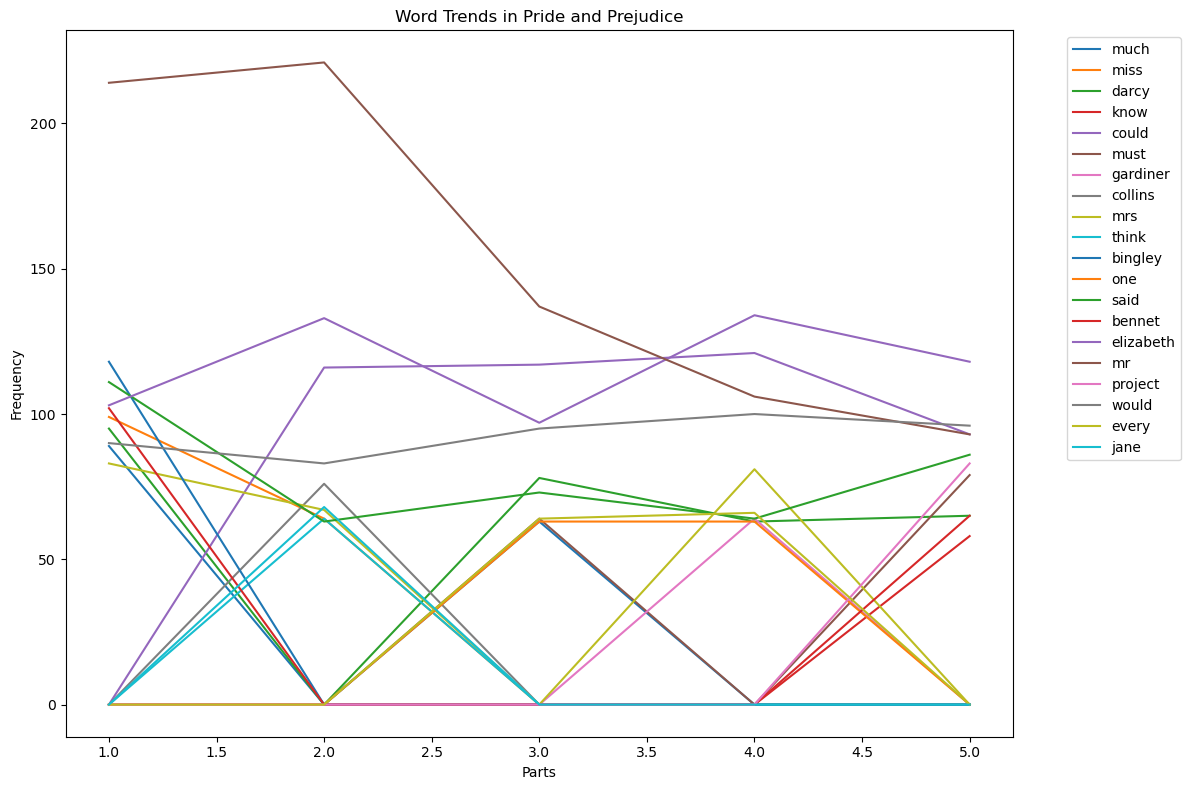

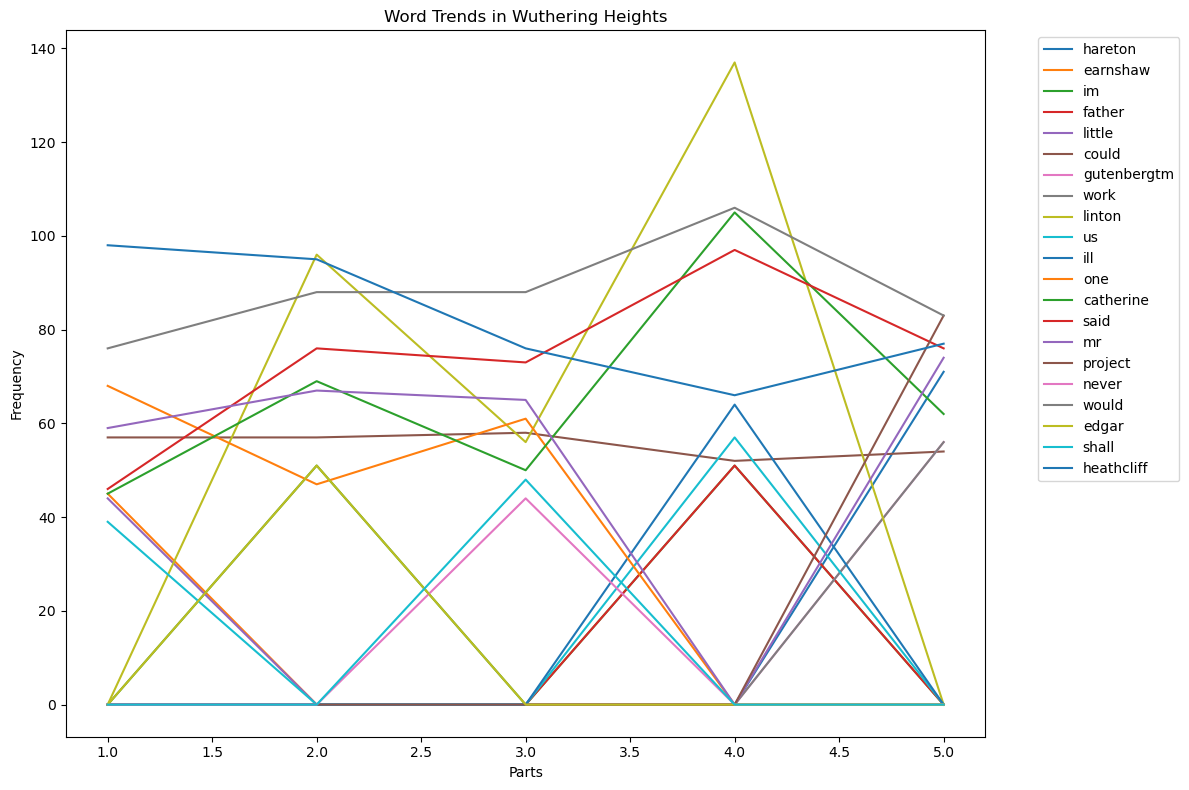

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter
import matplotlib.pyplot as plt

# NLTK 데이터 다운로드 (최초 실행 시 필요)
nltk.download('punkt')
nltk.download('stopwords')

# 텍스트 파일 읽기 함수
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# 파일 경로
pride_and_prejudice_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Pride-and-Prejudice_Jane-Austen.txt'
wuthering_heights_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Wuthering-Heights-Emily-Bronte.txt'

# 텍스트 데이터 읽기
pride_and_prejudice = read_text_file(pride_and_prejudice_path)
wuthering_heights = read_text_file(wuthering_heights_path)

# 텍스트 전처리 함수
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

pride_and_prejudice = preprocess(pride_and_prejudice)
wuthering_heights = preprocess(wuthering_heights)

# 단어 토큰화 및 불용어 제거
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

tokens_pp = tokenize_and_remove_stopwords(pride_and_prejudice)
tokens_wh = tokenize_and_remove_stopwords(wuthering_heights)

# 텍스트를 일정한 길이로 나누기
def split_text(tokens, n_parts):
    length = len(tokens)
    part_length = length // n_parts
    parts = [tokens[i * part_length:(i + 1) * part_length] for i in range(n_parts)]
    return parts

n_parts = 5
parts_pp = split_text(tokens_pp, n_parts)
parts_wh = split_text(tokens_wh, n_parts)

def most_common_words(parts, n=10):
    most_common_list = []
    for i, part in enumerate(parts):
        word_counts = Counter(part)
        most_common = word_counts.most_common(n)
        most_common_list.append(most_common)
    return most_common_list

most_common_pp = most_common_words(parts_pp)
most_common_wh = most_common_words(parts_wh)

def plot_word_trends(most_common_list, title):
    words = set()
    for part in most_common_list:
        words.update([word for word, _ in part])
    
    word_trends = {word: [] for word in words}
    
    for part in most_common_list:
        word_counts = dict(part)
        for word in words:
            word_trends[word].append(word_counts.get(word, 0))
    
    plt.figure(figsize=(12, 8))
    for word, counts in word_trends.items():
        plt.plot(range(1, n_parts + 1), counts, label=word)
    
    plt.title(title)
    plt.xlabel('Parts')
    plt.ylabel('Frequency')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 시각화
plot_word_trends(most_common_pp, 'Word Trends in Pride and Prejudice')
plot_word_trends(most_common_wh, 'Word Trends in Wuthering Heights')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimdw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


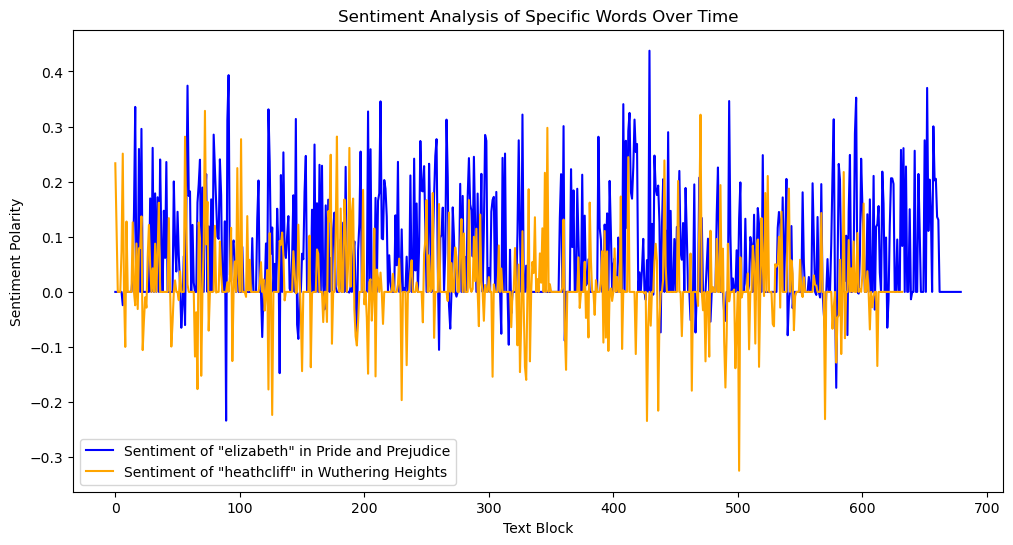

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np

# NLTK 데이터 다운로드 (최초 실행 시 필요)
nltk.download('punkt')
nltk.download('stopwords')

# 텍스트 파일 읽기 함수
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# 파일 경로
pride_and_prejudice_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Pride-and-Prejudice_Jane-Austen.txt'
wuthering_heights_path = 'C:/Users/kimdw/OneDrive/바탕 화면/literature_analysis/Wuthering-Heights-Emily-Bronte.txt'

# 텍스트 데이터 읽기
pride_and_prejudice = read_text_file(pride_and_prejudice_path)
wuthering_heights = read_text_file(wuthering_heights_path)

# 텍스트 전처리 함수
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

pride_and_prejudice = preprocess(pride_and_prejudice)
wuthering_heights = preprocess(wuthering_heights)

# 단어 토큰화 및 불용어 제거
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

tokens_pp = tokenize_and_remove_stopwords(pride_and_prejudice)
tokens_wh = tokenize_and_remove_stopwords(wuthering_heights)

def split_text_into_blocks(text, block_size=1000):
    return [text[i:i+block_size] for i in range(0, len(text), block_size)]

blocks_pp = split_text_into_blocks(pride_and_prejudice)
blocks_wh = split_text_into_blocks(wuthering_heights)

def calculate_word_sentiment(word, blocks):
    sentiment_scores = []
    for block in blocks:
        blob = TextBlob(block)
        sentences = blob.sentences
        word_sentences = [sentence for sentence in sentences if word in sentence.words]
        if word_sentences:
            sentiment = np.mean([sentence.sentiment.polarity for sentence in word_sentences])
        else:
            sentiment = 0
        sentiment_scores.append(sentiment)
    return sentiment_scores

word_pp = 'elizabeth'
word_wh = 'heathcliff'

sentiment_scores_pp = calculate_word_sentiment(word_pp, blocks_pp)
sentiment_scores_wh = calculate_word_sentiment(word_wh, blocks_wh)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(sentiment_scores_pp, label=f'Sentiment of "{word_pp}" in Pride and Prejudice', color='blue')
plt.plot(sentiment_scores_wh, label=f'Sentiment of "{word_wh}" in Wuthering Heights', color='orange')
plt.xlabel('Text Block')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis of Specific Words Over Time')
plt.legend()
plt.show()
